In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High



<h1 style="font-size: 30px;">Exploratory Data Analysis</h1>

C:\Users\anshi\AppData\Local\Temp\ipykernel_21616\668981121.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\anshi\AppData\Local\Temp\ipykernel_21616\668981121.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\anshi\AppData\Local\Temp\ipykernel_21616\668981121.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\anshi\AppData\Local\Temp\ipykernel_21616\668981121.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].

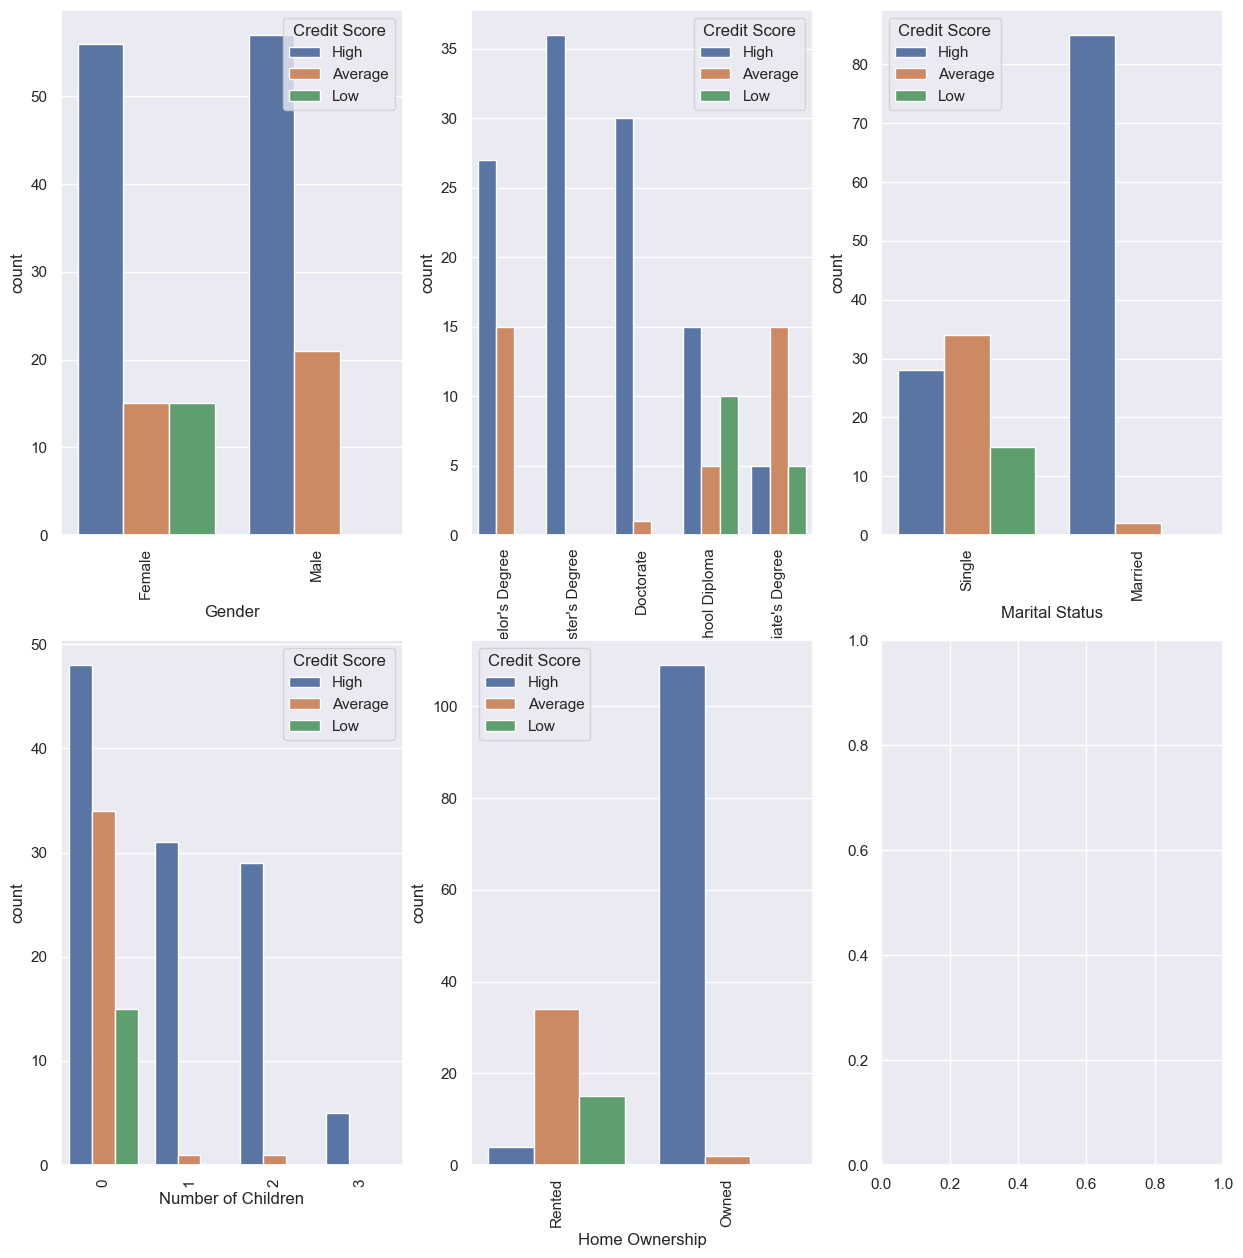

In [6]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Credit Score', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

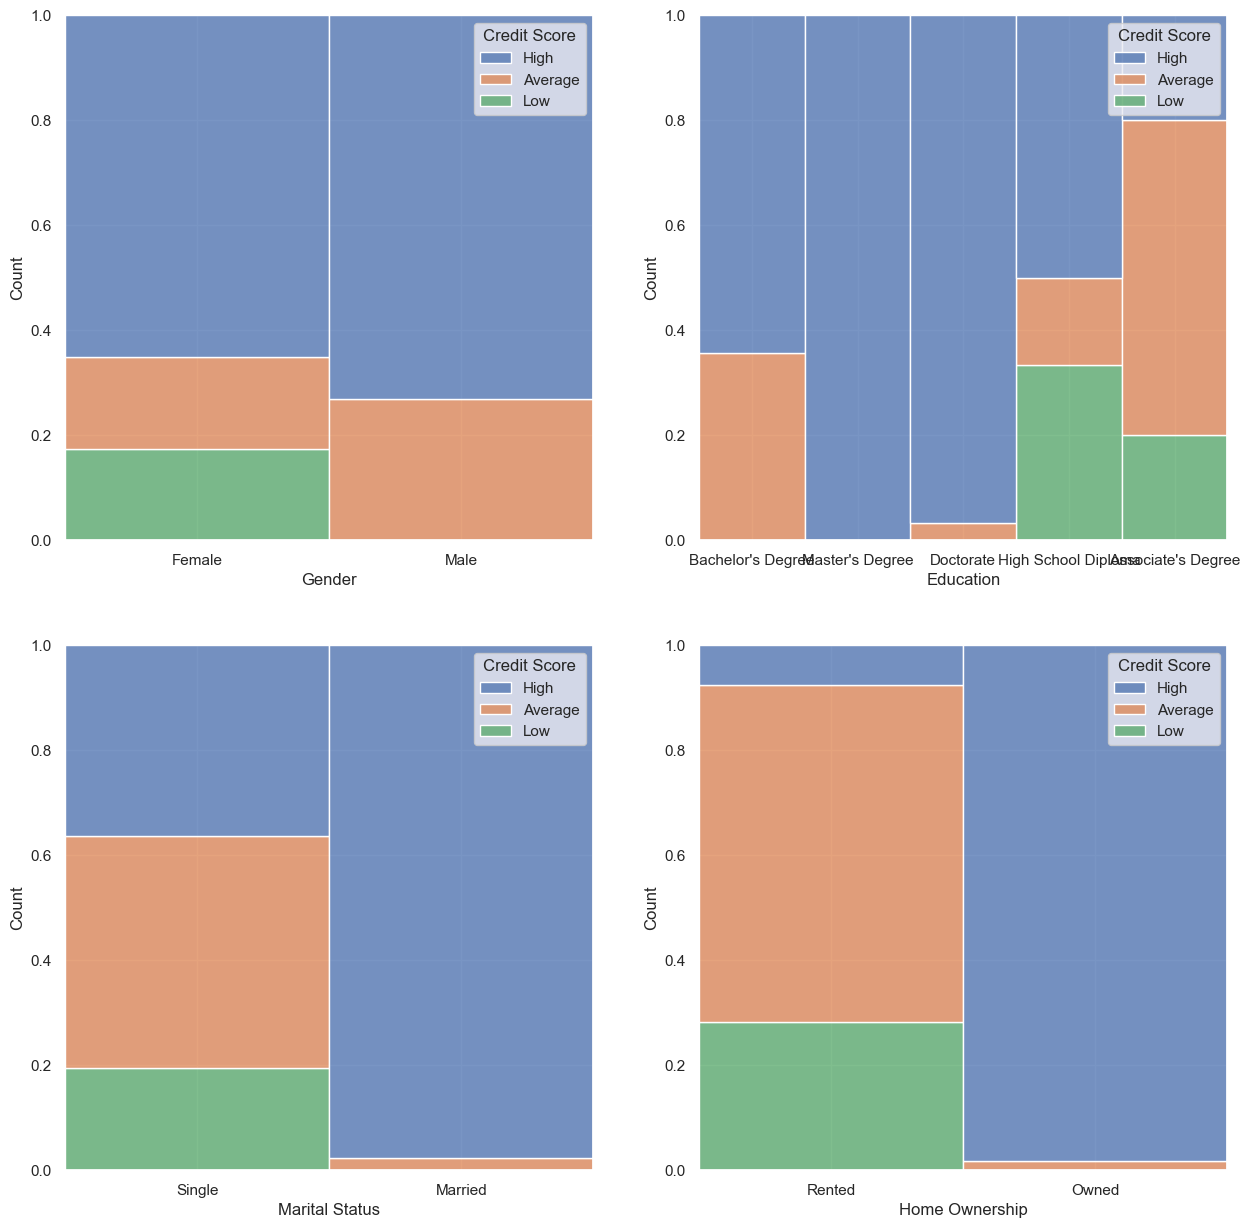

In [7]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Credit Score', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True)

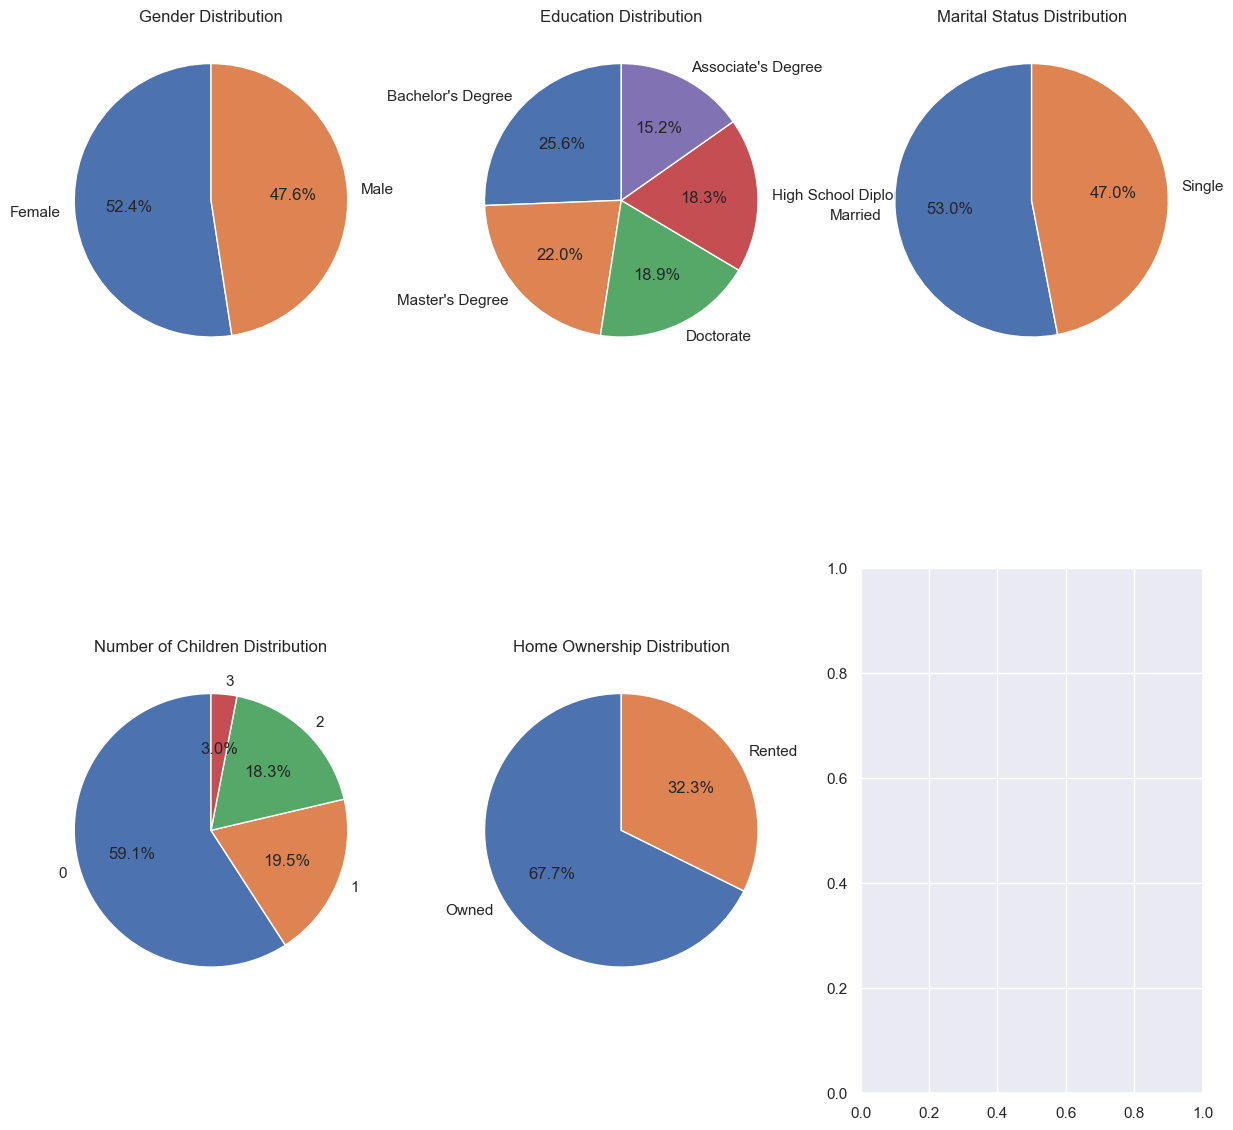

In [8]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

<Axes: xlabel='Income', ylabel='Credit Score'>

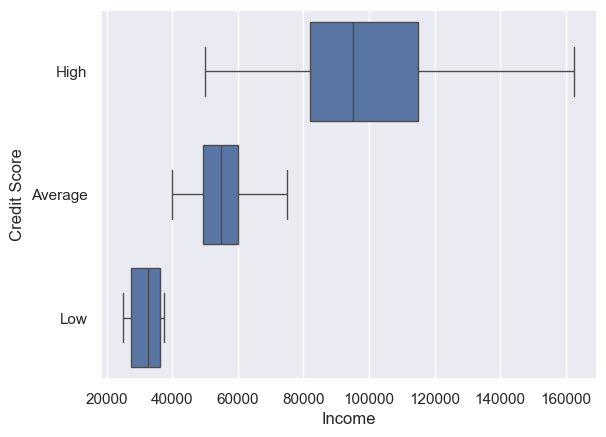

In [10]:
num_vars = ['Age', 'Income']
sns.boxplot(x='Income', data=df, y='Credit Score')

<Axes: xlabel='Age', ylabel='Credit Score'>

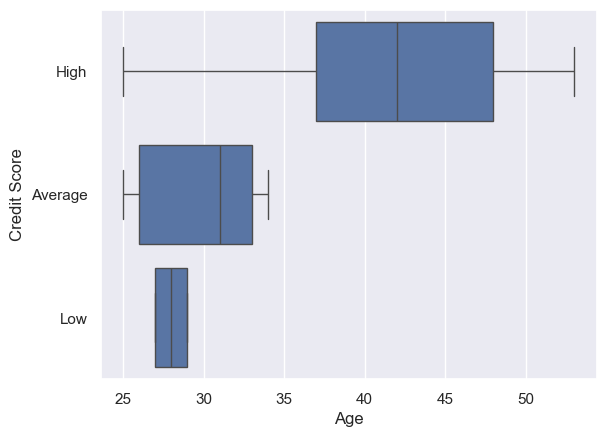

In [12]:
num_vars = ['Age', 'Income']
sns.boxplot(x='Age', data=df, y='Credit Score')




<h2 style="font-size: 30px;">Data Preprocessing</h2>

Dropping rows with average credit score

In [18]:
df.drop(df[(df['Credit Score']=='Average')].index,inplace=True)

In [20]:
df = pd.get_dummies(df)

In [22]:
from sklearn.preprocessing import StandardScaler
df.drop(['Home Ownership_Rented','Credit Score_Low'], axis=1, inplace=True)
df.head()

,Age,Income,Number of Children,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Credit Score_High
0,25,50000,0,True,False,False,True,False,False,False,False,True,False,True
1,30,100000,2,False,True,False,False,False,False,True,True,False,True,True
2,35,75000,1,True,False,False,False,True,False,False,True,False,True,True
3,40,125000,0,False,True,False,False,False,True,False,False,True,True,True
4,45,100000,3,True,False,False,True,False,False,False,True,False,True,True


In [24]:
X = df.iloc[0:,0:11]
Y= df.iloc[0:,11]

In [26]:
X = X.to_numpy()
Y = Y.to_numpy()

In [28]:
X=StandardScaler().fit_transform(X)
#Scaling the data

In [30]:
len(X)

128

<h2 style="font-size: 24px;">Splitting the data</h2>

In [33]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.6,random_state=8)


<h2 style="font-size: 24px;">Logistic Regression</h2>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
logr = LogisticRegression()
logr.fit(Xtrain,Ytrain)
Ypred = logr.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
acc_score = accuracy_score(Ytest,Ypred)

In [38]:
print(cmat,acc_score)

[[51  0]
 [ 0 26]] 1.0


<h3 style="font-size: 24px;">KNN</h3>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)
Ypred = knn.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
acc_score = accuracy_score(Ytest,Ypred)

In [43]:
print(cmat,",",acc_score)

[[51  0]
 [ 1 25]] , 0.987012987012987


<h3 style="font-size: 24px;">SVC</h3>

In [46]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.1)
clf.fit(X,Y)

SVC(C=0.1, kernel='linear')

In [48]:
Ypred = clf.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
acc_score = accuracy_score(Ytest,Ypred)

In [50]:
print(cmat,",",acc_score)

[[51  0]
 [ 0 26]] , 1.0
